Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 

    * Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro

Domingo 19/01 23:59 fecha entrega.


### Librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carga y Limpieza
### Carga csv con pandas

In [ ]:
df = pd.read_csv("diamonds.csv")
df.head(2)

In [ ]:
df.info()


### Limpieza de valores error

In [4]:
df = df.replace('?', np.nan)

### Cambio de tipo de datos

In [5]:
df["carat"] = df["carat"].astype("float32")
df["price"] = df["price"].astype("float")
df["x"] = df["x"].astype("float32")
df["clarity"] = df["clarity"].astype("category")

In [ ]:
df.info()

### Limpieza NaN

In [ ]:
df.count()

In [ ]:
df.isna().sum()

In [9]:
df["carat"] = df["carat"].fillna(df["carat"].mean())
df["cut"] = df["cut"].fillna(df["cut"].mode().iloc[0])
df["color"] = df["color"].fillna(df["color"].mode().iloc[0])
df["clarity"] = df["clarity"].fillna(df["clarity"].mode().iloc[0])
df["table"] = df["table"].fillna(df["table"].mean())
df["price"] = df["price"].fillna(df["price"].mean())
df["price"] = df["price"].astype("int32")
df["x"] = df["x"].fillna(df["x"].mean())
df["y"] = df["y"].fillna(df["y"].mean())
df["z"] = df["z"].fillna(df["z"].mean())

In [ ]:
df.info()

## Encoding

* Get_dummies()

In [ ]:
df_encoded = pd.get_dummies(df, columns=["cut"])
df_encoded

In [ ]:
cols_corr = ["cut_Fair", "cut_Fair", "cut_Ideal", "cut_Very Good","cut_Premium", "depth", "table", "price"]
df_corr = df_encoded[cols_corr].corr()
px.imshow(df_corr)

* Encodig Ordinal

In [ ]:
df["cut"].value_counts()

In [ ]:
mapeo_cut = {
    "Ideal": 1,
    "Premium": 2,
    "Very Good": 3,
    "Good": 4,
    "Fair": 5
}

df["cut"] = df["cut"].map(mapeo_cut)
df["cut"] = df["cut"].astype(int)
df.head()

### Creacion columnas

* price_iva

In [ ]:
df["price_iva"] = df["price"] * 1.21
df.head()

* Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

In [16]:
def desc_price(row):
    print(row)
    if row["price"] <= 1000 & row["cut"] == 1:
        return row["price"] * 0.9
    elif 1000 <= row["price"] <=5000 & row["cut"] == 2:
        return row["price"] * 0.85
    else:
        return row["price"]  

In [ ]:
df["price_discount"] = df.apply(desc_price, axis=1)

* volumen ( x, y, z)

In [ ]:
df["volume"] = df["x"] * df["y"] * df["z"]
df.head()

* organizar columnas

In [19]:
def ordenar_col(lugar, col):
    position = df.columns.get_loc(lugar) #obtine posicion a insertar
    serie_decade = df.pop(col) # saca la columna con pop
    df.insert(position, col, serie_decade)  #inserta la columna col en la posicion obtenida

In [ ]:
ordenar_col("price_iva", "price")
ordenar_col("price", "volume")
df.head()

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1,4,1)
sns.histplot(df["carat"])
plt.subplot(1,4,2)
sns.histplot(df["cut"])
plt.subplot(1,4,3)
sns.histplot(df["color"])
plt.subplot(1,4,4)
sns.histplot(df["clarity"])
plt.figure(figsize=(16, 8))
plt.subplot(1,4,1)
sns.histplot(df["depth"])
plt.subplot(1,4,2)
sns.histplot(df["table"])
plt.subplot(1,4,3)
sns.histplot(df["x"])
plt.subplot(1,4,4)
sns.histplot(df["y"])
plt.figure(figsize=(16, 8))
plt.subplot(1,4,1)
sns.histplot(df["z"])
plt.subplot(1,4,2)
sns.histplot(df["volume"])
plt.subplot(1,4,3)
sns.histplot(df["price"])
plt.subplot(1,4,4)
sns.histplot(df["price_discount"])



### Orden de columnas


* Tipo de corte

In [ ]:
df.sort_values("cut", inplace=True)
df.head(15)

* Precio

In [ ]:
df.sort_values("price", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

### Agrupaciones group_by()

* carac

In [ ]:
df.groupby(by = "color").aggregate({"price":["min", "max", "mean"]})

* price

In [ ]:
df.groupby(by="cut", as_index = False).aggregate({"price":["min", "max", "mean"]})

In [ ]:
group_cut = df.groupby(by="cut", as_index = False).aggregate({"price":["min", "max", "mean"]}).sum().plot()

In [ ]:
df.groupby('cut')[['carat', 'depth', 'table', 'price']]. agg(['mean', 'min', 'max'])

In [ ]:
df.groupby('carat')['price'].sum().plot();

In [ ]:
df.groupby('carat')['price'].plot();

* depth

In [ ]:
df.groupby(by="depth", as_index = False).agg({'price': ['max', 'min']})

In [ ]:
df.groupby(by="depth", as_index = False).agg({'price': ['max', 'min']}).plot()

#### Correlacion
* Calculo con pandas

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

In [38]:
cols_corr = ["carat", "x", "y", "z","price", "volume"]
df_corr = df[cols_corr].corr()


* Mostrar con Seaborn

In [ ]:
sns.heatmap(df_corr, annot=True, cmap="viridis")

In [ ]:
sns.heatmap(df[["price", "x", "y", "z", "carat"]].corr(), annot=True, cmap="viridis") 

In [41]:
df_pt = df.pivot_table( index="cut", columns="color", values="price", aggfunc="mean")

In [ ]:
sns.heatmap(df_pt)


In [ ]:
sns.clustermap(df_pt)

* Combinarlas con filtros hue, style

In [44]:
#

## Outliers
* Visualizacion Q1 y Q3 

In [50]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1


* Limites Tukey y filtro

In [53]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

filtro = (df["price"] <= upper_limit) & (df["price"] >= lower_limit) 
df_no_outliers = df[filtro]


In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Data frame original")
sns.histplot(df,x="price", color="green", kde=True)
plt.axvline(q3, color="magenta", linewidth=1, label="Q3")
plt.axvline(q1, color="magenta", linewidth=1, label= "Q1")
plt.axvline(df["price"].mean(), color="magenta", linewidth=1, label="media")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Data frame sin outliers")
sns.histplot(df_no_outliers, x="price", kde=True)
plt.axvline(q3, color="magenta", linewidth=1, label="Q3")
plt.axvline(q1, color="magenta", linewidth=1, label= "Q1")
plt.axvline(df["price"].mean(), color="magenta", linewidth=1, label="media")
plt.legend()
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Boxplot sin outliers")
sns.violinplot(x=df["price"])
plt.subplot(1, 2, 2)
plt.title("Boxplot sin outliers")
sns.violinplot(x=df_no_outliers["price"], color="magenta")
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(df,x="price", kde=True, color="green", label="df original")
sns.histplot(df_no_outliers, x="price", color="orange", kde=True, label="df sin outliers")
plt.axvline(q3, color="magenta", linewidth=1, label="Q3")
plt.axvline(q1, color="magenta", linewidth=1, label= "Q1")
plt.axvline(df["price"].mean(), color="magenta", linewidth=1, label="media")
plt.legend()
plt.subplot(1, 2, 2)
sns.violinplot(x=df["price"], label="df original")
sns.violinplot(x=df_no_outliers["price"], color="magenta", label="df sin outliers")
plt.legend()

## Transformacion de datos
* Asimetria

In [ ]:
df["price"].skew()

* Curtosis

In [ ]:
df["price"].kurtosis()

* Transformacion logaritmo

* Transformacion raiz cuadrada

## Discretizar la columna precio
* barato, medio, caro

In [ ]:
#print(df_no_outliers["price"].max())
#print(df_no_outliers["price"].mean())
#print(df_no_outliers["price"].min())

rangos = [df["price"].min(), 3000, 7600, df["price"].max()]
label = ["Barato", "Medio", "Caro"]
df["price_discret"] = pd.cut(df["price"], bins=rangos, labels=label)
df.head()

In [ ]:
sns.countplot(df, x='price_discret', hue="cut")

## Seaborn EDAS
### Univariantes

* Histograma y curva de densidad

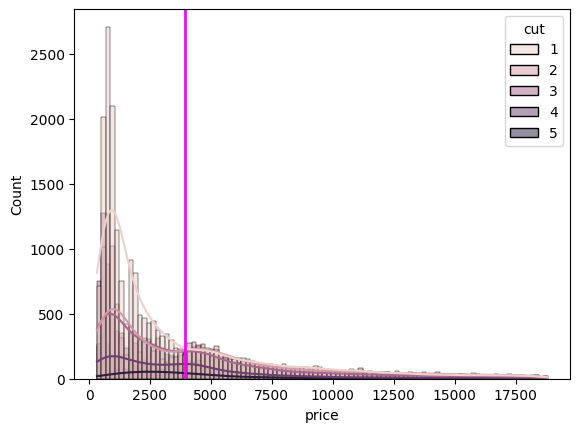

In [ ]:
sns.histplot(df, x="price", kde=True, color="green", hue="cut", bins=100)
plt.axvline(df["price"].mean(), color="magenta", linewidth=2)

In [ ]:
sns.kdeplot(df, x="price")
sns.rugplot(df, x="price")
plt.axvline(df["price"].mean(), color="magenta")
plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
plt.axvline(df['price'].quantile(0.75), color='magenta', linestyle='--')

* Boxplot

In [ ]:
sns.boxplot(df, x=df["price"], hue=df["cut"])

* Countplot

In [ ]:
sns.countplot(df, x="price")

### Bivariantes y Multivariantes
* Scatterplot

In [ ]:
sns.scatterplot(df, x="price", y="carat", hue="color")


In [ ]:
sns.scatterplot(df, x="price", y="depth", hue="color", style="cut")


In [ ]:
sns.scatterplot(df, x="volume", y="price", hue="color", style="cut", size="depth")

In [1]:
sns.jointplot(df, x="price", y="depth", hue="color")

NameError: name 'sns' is not defined


order = diamonds['cut'].value_counts().index 

sns.countplot(data=diamonds, x='cut', order=order)